In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_excel, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 폰트 설정
plt.rcParams['font.family'] = "Malgun Gothic" # 윈도우 전용
# plt.rcParams['font.family'] = "Malgun Gothic"
#글자 크기
plt.rcParams["font.size"] = 12
# 그래프 크기설정(inch)
plt.rcParams["figure.figsize"] = (15, 7)
# 유티코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

In [3]:
csv_test = pd.read_csv('pratice.csv', encoding='euc-kr')
csv_test

,품목,등급,단량,단위,평균가
0,가죽나물(가죽나물(일반)),없음,4.0,kg,32000
1,가죽나물(가죽나물(일반)),특(1등,2.0,kg,14000
2,가죽나물(가죽나물(일반)),없음,4.0,kg,25000
3,가죽나물(가죽나물(일반)),없음,4.0,kg,25000
4,가죽나물(가죽나물(일반)),없음,4.0,kg,30000
...,...,...,...,...,...
15725,홍고추(홍청양),특(1등,10.0,kg,43500
15726,홍고추(홍청양),특(1등,11.0,kg,50000
15727,홍고추(홍청양),특(1등,13.0,kg,58000
15728,홍고추(홍청양),특(1등,4.0,kg,23000


In [4]:
csv_test.shape

(15730, 5)

In [5]:
df = csv_test.drop(['단위'], axis=1)
df

,품목,등급,단량,평균가
0,가죽나물(가죽나물(일반)),없음,4.0,32000
1,가죽나물(가죽나물(일반)),특(1등,2.0,14000
2,가죽나물(가죽나물(일반)),없음,4.0,25000
3,가죽나물(가죽나물(일반)),없음,4.0,25000
4,가죽나물(가죽나물(일반)),없음,4.0,30000
...,...,...,...,...
15725,홍고추(홍청양),특(1등,10.0,43500
15726,홍고추(홍청양),특(1등,11.0,50000
15727,홍고추(홍청양),특(1등,13.0,58000
15728,홍고추(홍청양),특(1등,4.0,23000


In [6]:
df.duplicated().sum()

2964

In [7]:
df.loc[df.duplicated(), :]

,품목,등급,단량,평균가
3,가죽나물(가죽나물(일반)),없음,4.0,25000
47,가지(가지(일반)),특(1등,10.0,33250
50,가지(가지(일반)),보통(3,5.0,10000
63,가지(가지(일반)),보통(3,5.0,10000
64,가지(가지(일반)),없음,8.0,25000
...,...,...,...,...
15710,홍고추(홍청양),특(1등,4.0,24000
15711,홍고추(홍청양),특(1등,5.0,25000
15717,홍고추(홍청양),특(1등,5.0,25000
15718,홍고추(홍청양),특(1등,10.0,47000


In [8]:
# df = df.drop_duplicates()
# df

In [9]:
df1 = df.drop(['품목'], axis=1)
df1

,등급,단량,평균가
0,없음,4.0,32000
1,특(1등,2.0,14000
2,없음,4.0,25000
3,없음,4.0,25000
4,없음,4.0,30000
...,...,...,...
15725,특(1등,10.0,43500
15726,특(1등,11.0,50000
15727,특(1등,13.0,58000
15728,특(1등,4.0,23000


In [10]:
target = []
for i in df1['등급']:
    if '없음' in i:
        target.append(0)
    elif '특' in i:
        target.append(1)
    elif '상' in i:
        target.append(2)
    else:
        target.append(3)
print(target)
df1['target'] = target

[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3, 1, 2, 3, 0, 2, 1, 2, 3, 0, 2, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 3, 1, 2, 1, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 3, 3, 1, 1, 1, 1, 2, 3, 1, 2, 3, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 1, 1, 2, 3, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 0, 1, 1, 3, 3, 1, 0, 1, 3, 1, 3, 3, 0, 1, 0, 1, 3, 0, 1, 0, 1, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 1, 1, 3, 0, 1, 3, 0, 1, 3, 0, 1, 3, 3, 0, 1, 3, 

In [11]:
# 시각화 라이브러리 설정
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [12]:
df1['target'].value_counts()

target
1    9532
2    3841
3    1354
0    1003
Name: count, dtype: int64

In [13]:
df1 = df1.drop(['등급'], axis=1)
df1

,단량,평균가,target
0,4.0,32000,0
1,2.0,14000,1
2,4.0,25000,0
3,4.0,25000,0
4,4.0,30000,0
...,...,...,...
15725,10.0,43500,1
15726,11.0,50000,1
15727,13.0,58000,1
15728,4.0,23000,1


In [14]:
df1.describe()

,단량,평균가,target
count,15730.000000,1.573000e+04,15730.000000
mean,5.838306,1.644555e+04,1.352575
std,5.273751,2.625578e+04,0.726623
min,0.010000,1.600000e+02,0.000000
25%,2.000000,5.000000e+03,1.000000
50%,4.000000,1.066700e+04,1.000000
75%,10.000000,1.900000e+04,2.000000
max,165.000000,1.416700e+06,3.000000


In [15]:
df1.rename(columns = {'단량' : 'number', "평균가" : 'avg_price'}, inplace = True)
df1

,number,avg_price,target
0,4.0,32000,0
1,2.0,14000,1
2,4.0,25000,0
3,4.0,25000,0
4,4.0,30000,0
...,...,...,...
15725,10.0,43500,1
15726,11.0,50000,1
15727,13.0,58000,1
15728,4.0,23000,1


In [16]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df1.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df1['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['number', 'avg_price']
pd.DataFrame(x, columns=features).head()

,number,avg_price
0,-0.348588,0.592439
1,-0.727836,-0.093146
2,-0.348588,0.325823
3,-0.348588,0.325823
4,-0.348588,0.516263


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['component1', 'component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [38]:
principalDf.head()

,component1,component2
0,0.172429,0.665406
1,-0.580522,0.448794
2,-0.016097,0.476880
3,-0.016097,0.476880
4,0.118564,0.611542


In [39]:
pca.explained_variance_ratio_

array([0.73582426, 0.26417574])

In [40]:
sum(pca.explained_variance_ratio_)

1.0

설명 가능한지 알 수 있다. 

본 데이터의 경우 두 개의 주성분이 전체 분산의 약 100%를 설명한다. 

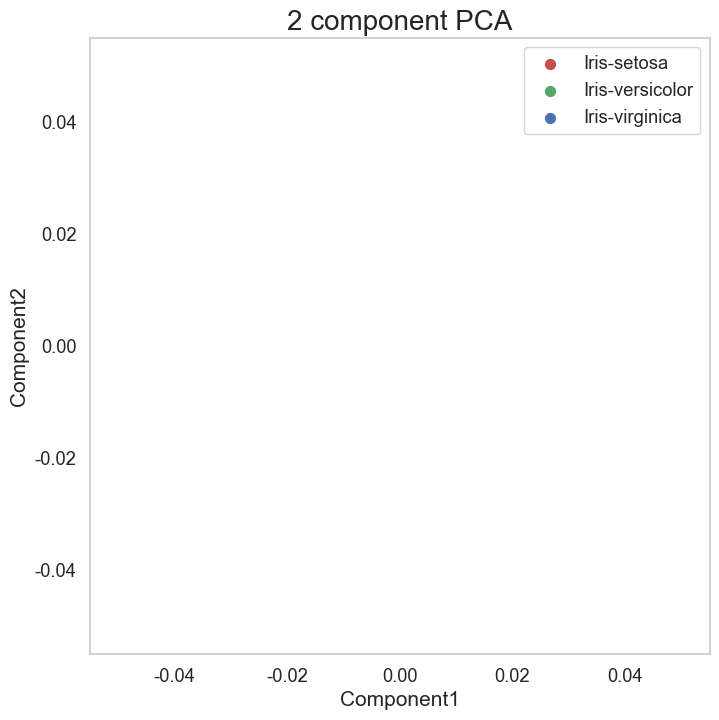

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Component1', fontsize = 15)
ax.set_ylabel('Component2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df1['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'component1']
               , principalDf.loc[indicesToKeep, 'component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

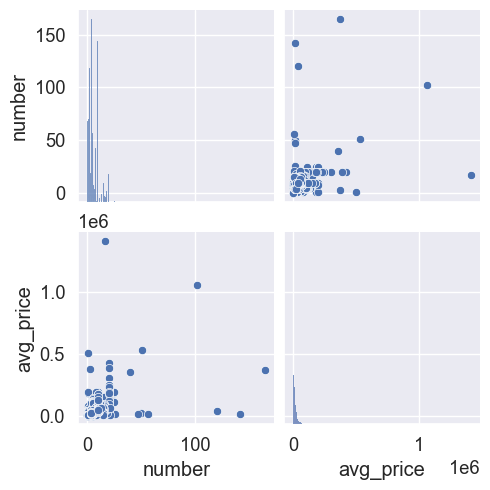

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df1[["number", "avg_price"]])
plt.show()

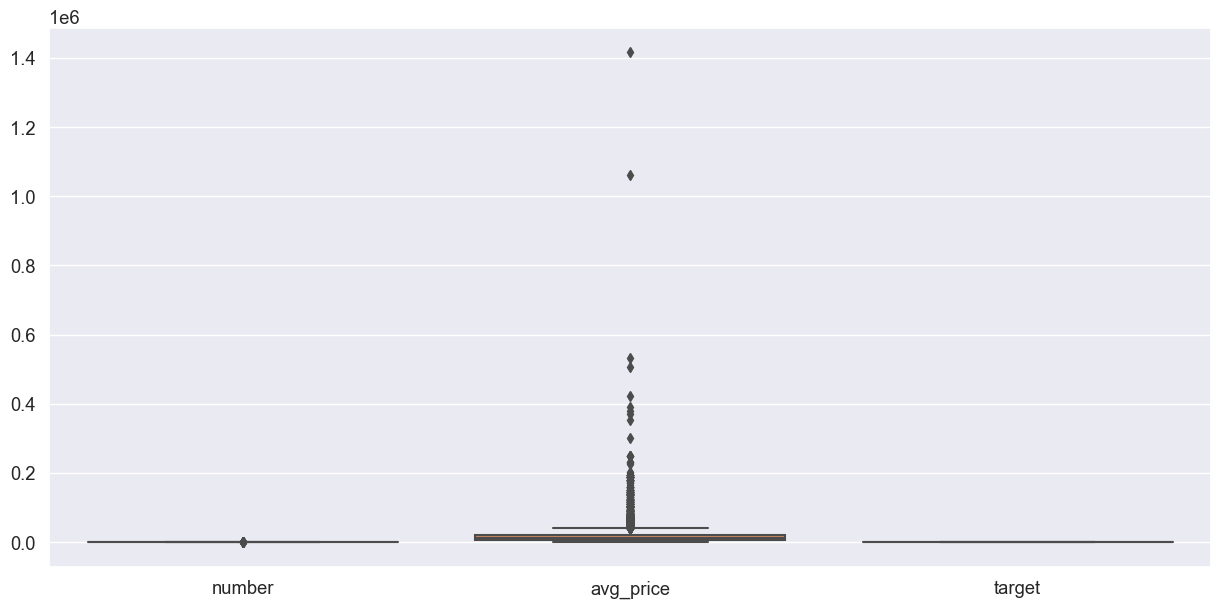

In [18]:
plt.figure()
sns.boxplot(data=df1)
plt.show()
plt.close()

In [19]:
q1 = df1['number'].quantile(q=0.25)
q3 = df1['number'].quantile(q=0.75)
iqr = q3 - q1
하한1 = q1 - iqr *1.5
"단량에 대한 하한 극단치 경계값: %f" % 하한1

'단량에 대한 하한 극단치 경계값: -10.000000'

In [20]:
q1 = df1['number'].quantile(q=0.25)
q3 = df1['number'].quantile(q=0.75)
iqr = q3 - q1
상한 = q3 + iqr * 1.5
"단량에 대한 상한 극단치 경계값: %f" % 상한

'단량에 대한 상한 극단치 경계값: 22.000000'

In [21]:
q1 = df1['avg_price'].quantile(q=0.25)
q3 = df1['avg_price'].quantile(q=0.75)
iqr = q3 - q1
하한2 = q1 - iqr *1.5
"평균가에 대한 하한 극단치 경계값: %f" % 하한2

'평균가에 대한 하한 극단치 경계값: -16000.000000'

In [22]:
q1 = df1['avg_price'].quantile(q=0.25)
q3 = df1['avg_price'].quantile(q=0.75)
iqr = q3 - q1
상한 = q3 + iqr * 1.5
"평균가에 대한 상한 극단치 경계값: %f" % 상한

'평균가에 대한 상한 극단치 경계값: 40000.000000'

In [23]:
df1.loc[df1["avg_price"] > 41213, "avg_price"] = np.nan
df1

,number,avg_price,target
0,4.0,32000.0,0
1,2.0,14000.0,1
2,4.0,25000.0,0
3,4.0,25000.0,0
4,4.0,30000.0,0
...,...,...,...
15725,10.0,NaN,1
15726,11.0,NaN,1
15727,13.0,NaN,1
15728,4.0,23000.0,1


In [24]:
df1.loc[df1["avg_price"] > 41213, "avg_price"] = np.nan
df1

,number,avg_price,target
0,4.0,32000.0,0
1,2.0,14000.0,1
2,4.0,25000.0,0
3,4.0,25000.0,0
4,4.0,30000.0,0
...,...,...,...
15725,10.0,NaN,1
15726,11.0,NaN,1
15727,13.0,NaN,1
15728,4.0,23000.0,1


In [25]:
df1.loc[df1["avg_price"] < -15356, "avg_price"] = np.nan
df1

,number,avg_price,target
0,4.0,32000.0,0
1,2.0,14000.0,1
2,4.0,25000.0,0
3,4.0,25000.0,0
4,4.0,30000.0,0
...,...,...,...
15725,10.0,NaN,1
15726,11.0,NaN,1
15727,13.0,NaN,1
15728,4.0,23000.0,1


In [26]:
df1.loc[df1["number"] < -10, "number"] = 5.8
df1

,number,avg_price,target
0,4.0,32000.0,0
1,2.0,14000.0,1
2,4.0,25000.0,0
3,4.0,25000.0,0
4,4.0,30000.0,0
...,...,...,...
15725,10.0,NaN,1
15726,11.0,NaN,1
15727,13.0,NaN,1
15728,4.0,23000.0,1


In [27]:
df1.loc[df1["number"] > 22, "number"] = 5.8
df1

,number,avg_price,target
0,4.0,32000.0,0
1,2.0,14000.0,1
2,4.0,25000.0,0
3,4.0,25000.0,0
4,4.0,30000.0,0
...,...,...,...
15725,10.0,NaN,1
15726,11.0,NaN,1
15727,13.0,NaN,1
15728,4.0,23000.0,1


In [28]:
df1.describe()

,number,avg_price,target
count,15730.000000,14651.000000,15730.000000
mean,5.783875,11966.385434,1.352575
std,4.779359,9092.740161,0.726623
min,0.010000,160.000000,0.000000
25%,2.000000,4920.500000,1.000000
50%,4.000000,10000.000000,1.000000
75%,10.000000,16982.000000,2.000000
max,21.000000,41200.000000,3.000000


In [29]:
df1 = df1.fillna(12575)
df1

,number,avg_price,target
0,4.0,32000.0,0
1,2.0,14000.0,1
2,4.0,25000.0,0
3,4.0,25000.0,0
4,4.0,30000.0,0
...,...,...,...
15725,10.0,12575.0,1
15726,11.0,12575.0,1
15727,13.0,12575.0,1
15728,4.0,23000.0,1


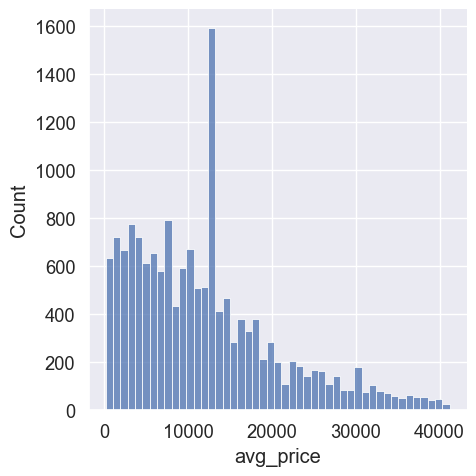

In [30]:
sns.displot(x='avg_price', kind='hist', data=df1)
plt.show()

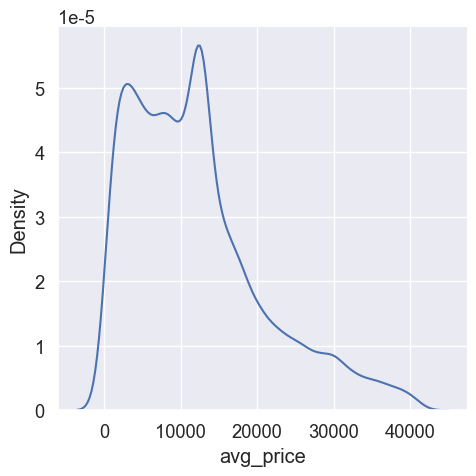

In [31]:
sns.displot(x='avg_price', kind='kde', data=df1)
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:

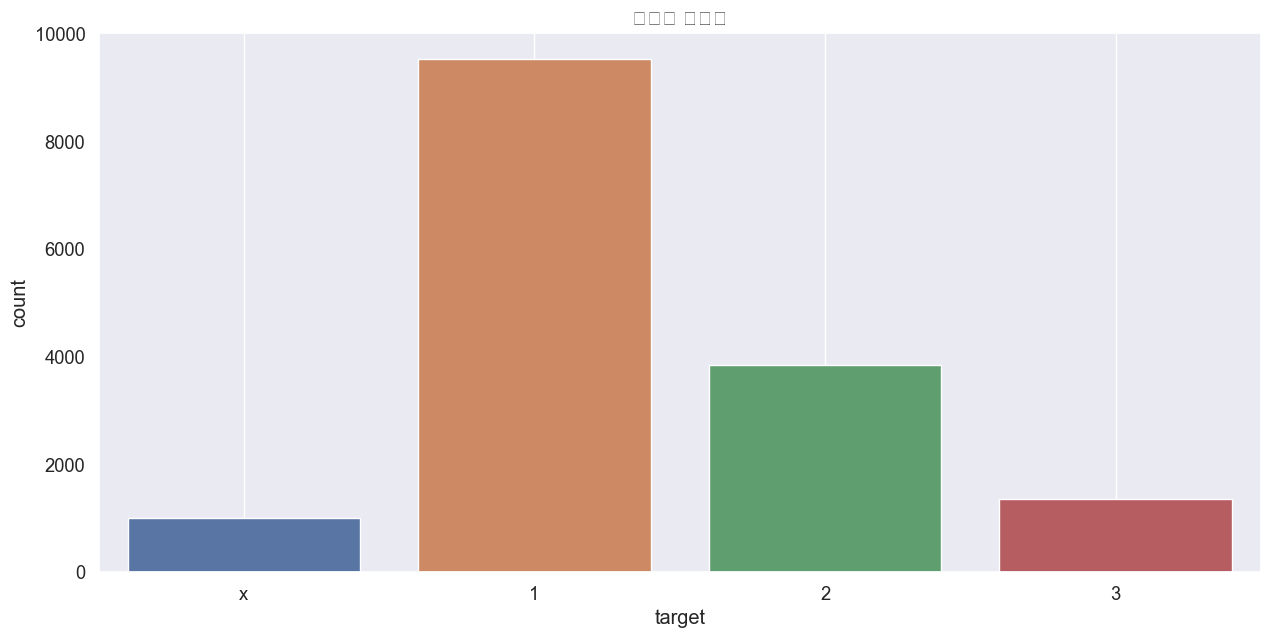

In [32]:
sns.countplot(data=df1, x="target")
plt.title("등급별 빈도수")
plt.xticks([0, 1, 2, 3], ['x', '1', '2', '3'])
plt.grid()
plt.show()
plt.close()

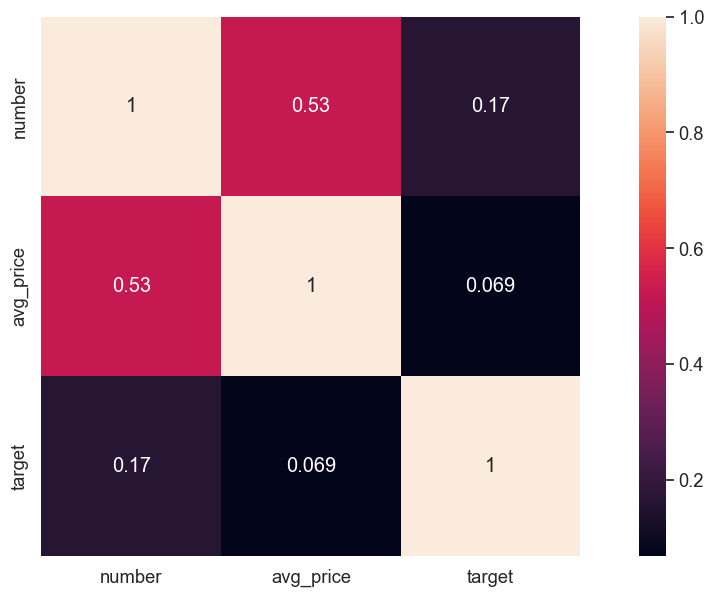

In [33]:
sns.heatmap(data=df1.corr(), square=True, annot=True, cbar=True)
plt.show()

<Axes: xlabel='number', ylabel='avg_price'>

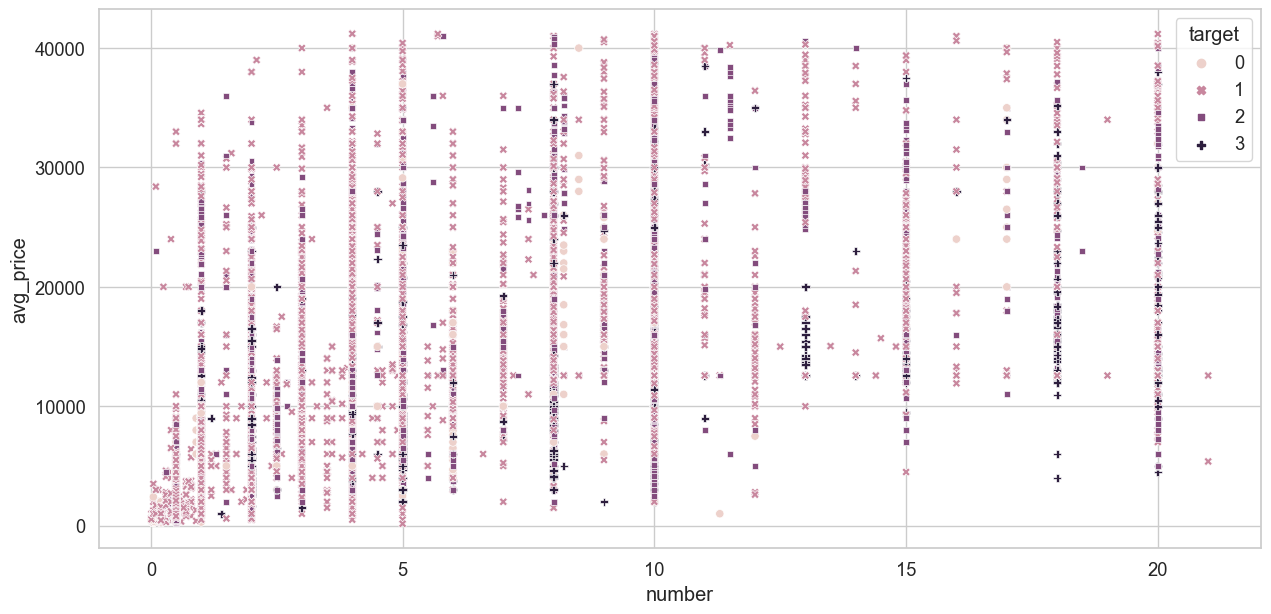

In [34]:
sns.set_style('whitegrid')
sns.scatterplot(data=df1, x='number',  y='avg_price',
                hue='target', 
                hue_order = ['0', '1', '2', '3'],
                style='target' 
               )

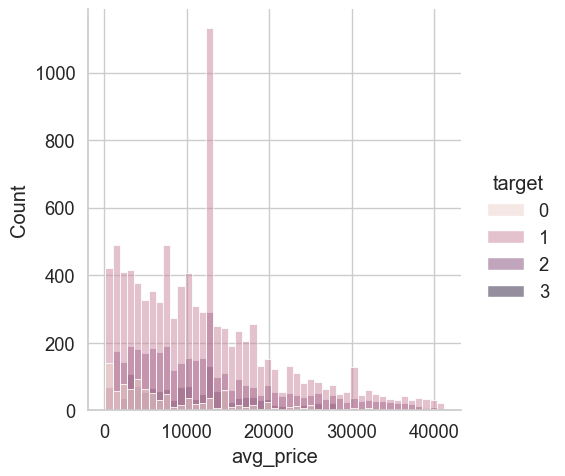

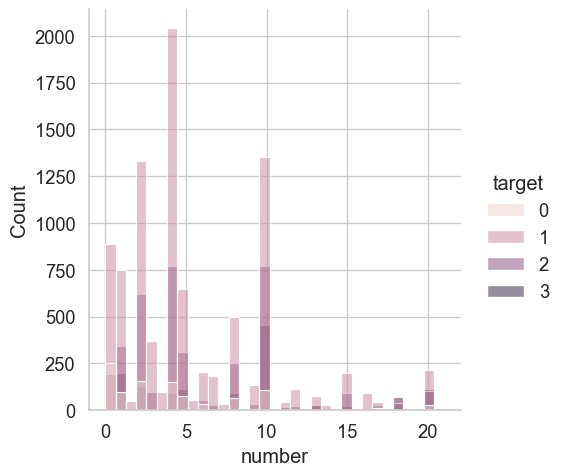

In [35]:
sns.displot(x='avg_price', hue='target', kind='hist', data=df1)
sns.displot(x='number', hue='target', kind='hist', data=df1)
plt.show()

In [36]:
sns.relplot(x='number', y='avg_price', data=result)
plt.title('price_number')
plt.show()

NameError: name 'result' is not defined

In [ ]:
df2 = df1.head(250)
df3 = df1.tail(250)
result = pd.concat([df2, df3])
print(result)

       number  avg_price  target
0         4.0    32000.0       0
1         2.0    14000.0       1
2         4.0    25000.0       0
3         4.0    25000.0       0
4         4.0    30000.0       0
...       ...        ...     ...
15725    10.0    12575.0       1
15726    11.0    12575.0       1
15727    13.0    12575.0       1
15728     4.0    23000.0       1
15729    10.0    12575.0       1

[500 rows x 3 columns]


<Axes: xlabel='number', ylabel='avg_price'>

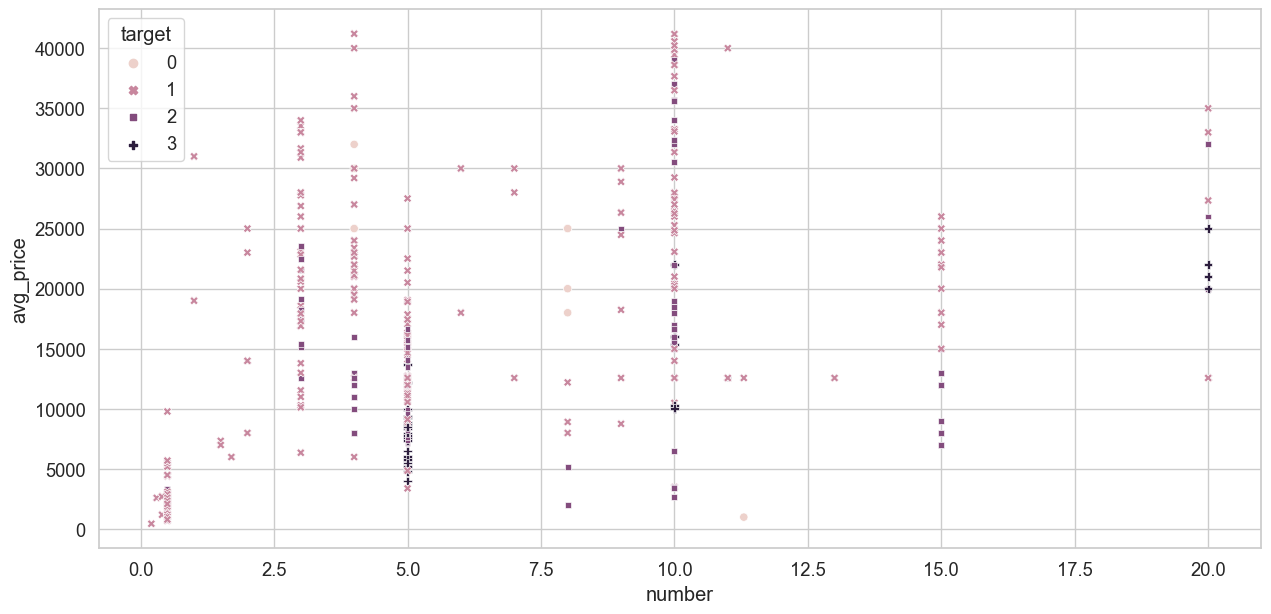

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(data=result, x='number',  y='avg_price',
                hue='target', 
                hue_order = ['0', '1', '2', '3'],
                style='target' 
               )

In [ ]:
from sklearn.preprocessing import StandardScaler

# 표준화란 데이터의 평균을 0, 분산과 표준편차를 1로 만들어주는 것을 말하는데요,
# 표준화를 하는 이유는 다른 통계 데이터와 비교하는 데에 있어 용이하게 하기 위함입니다.

# StandardScaler 객체 생성
scaler = StandardScaler()

# standardSacler 로 데이터 셋 변환. fit()과 transfrom() ghcnf
scaler.fit(df1)
scaled = scaler.transform(df1)
scaled

array([[-0.37325757,  2.27791433, -1.86151148],
       [-0.79173699,  0.22695737, -0.48523889],
       [-0.37325757,  1.48031996, -1.86151148],
       ...,
       [ 1.50989982,  0.06458995, -0.48523889],
       [-0.37325757,  1.25243585, -0.48523889],
       [ 0.88218069,  0.06458995, -0.48523889]])

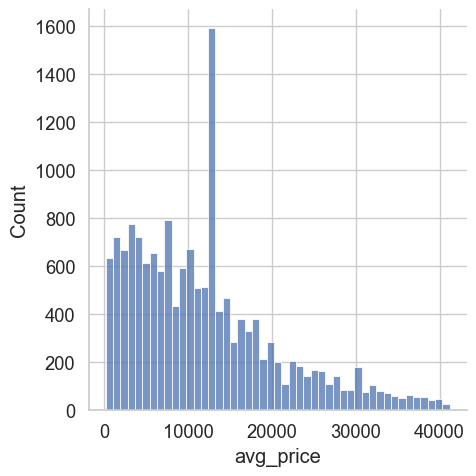

In [ ]:
sns.displot(x='avg_price', kind='hist', data=df1)
plt.show()

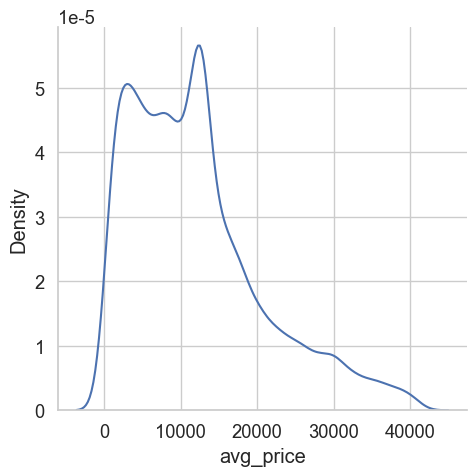

In [ ]:
sns.displot(x='avg_price', kind='kde', data=df1)
plt.show()

<Axes: xlabel='number', ylabel='avg_price'>

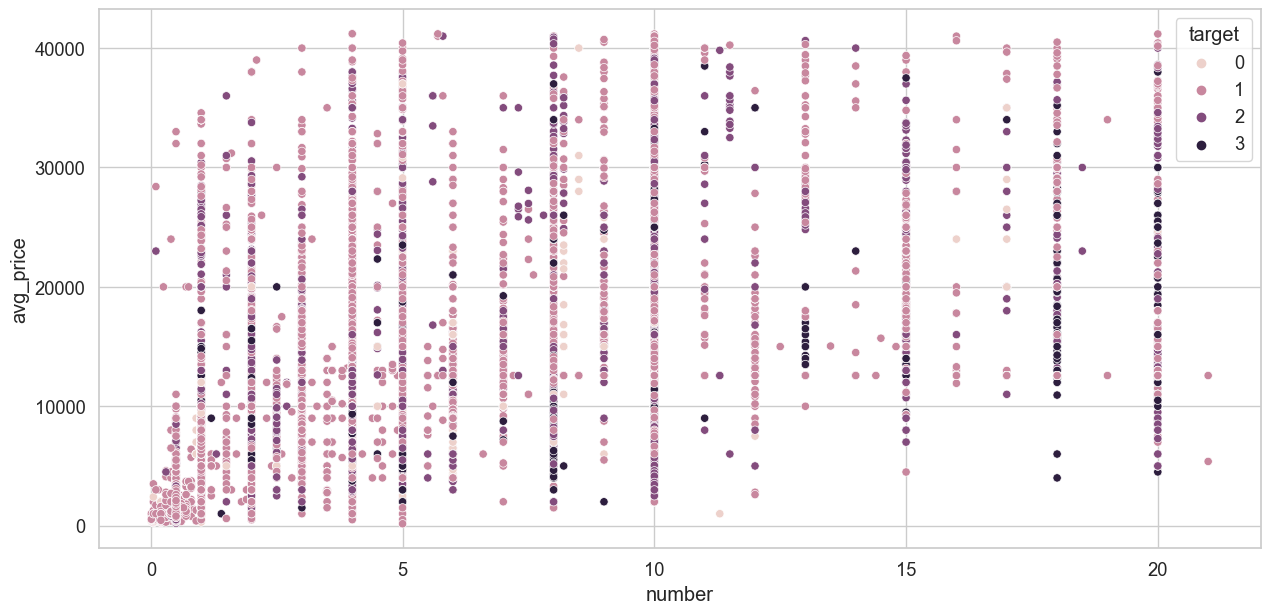

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(data=df1, x='number',  y='avg_price',
                hue='target', 
                hue_order = ['0', '1', '2', '3'] 
               )

In [ ]:
df2 = df1.head(250)
df3 = df1.tail(250)
result = pd.concat([df2, df3])
print(result)

       number  avg_price  target
0         4.0    32000.0       0
1         2.0    14000.0       1
2         4.0    25000.0       0
3         4.0    25000.0       0
4         4.0    30000.0       0
...       ...        ...     ...
15725    10.0    12575.0       1
15726    11.0    12575.0       1
15727    13.0    12575.0       1
15728     4.0    23000.0       1
15729    10.0    12575.0       1

[500 rows x 3 columns]


<Axes: xlabel='avg_price', ylabel='number'>

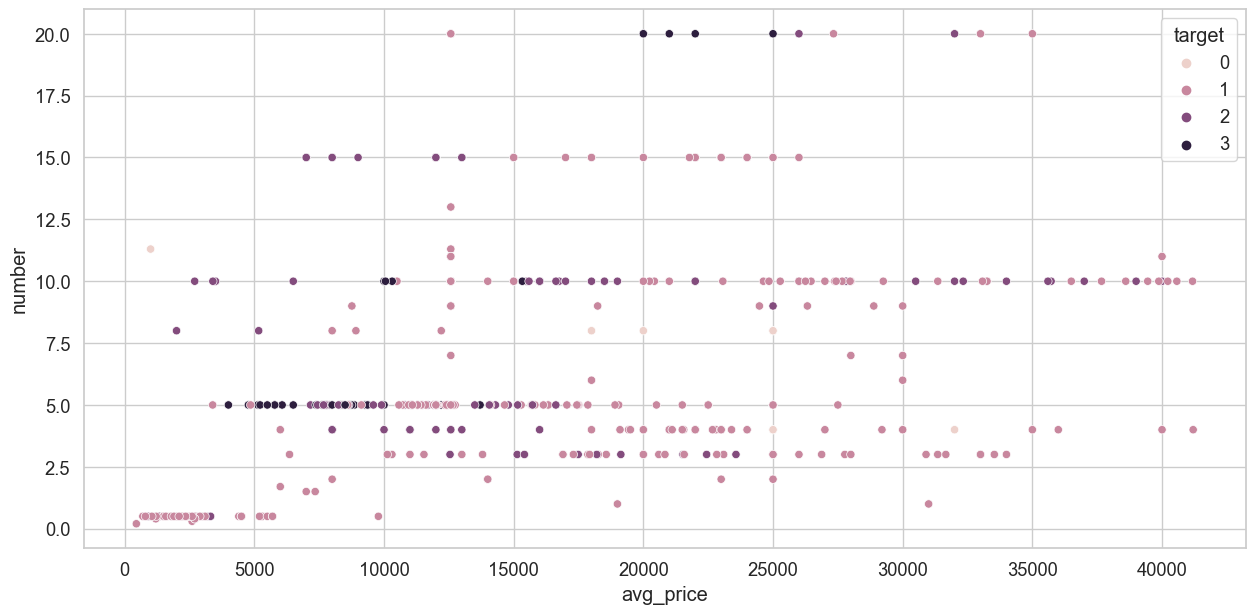

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(data=result, x='avg_price',  y='number',
                hue='target', 
                hue_order = ['0', '1', '2', '3'] 
               )

In [ ]:
# sns.pairplot(df1, size=2.5, diag_kind='hist')
# plt.show()

In [ ]:
# fig, ax = plt.subplots(2, 2, figsize=(20, 12))

# df1.plot(ax=ax[0][0])                                    
# df1.plot.bar(ax=ax[0][1])                                  
# df1['target'].plot.pie(ax=ax[1][0])                       
# df1.plot.scatter(x='단량', y='평균가', ax=ax[1][1])    

# plt.show()
# plt.close()

In [ ]:
from sklearn.model_selection import train_test_split
x_data = df1.loc[:,'number':'avg_price']
y_data = df1.loc[:,'target']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(12584, 2) (12584,)
(3146, 2) (3146,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_knn_pred = knn.predict(x_test)
print("예측값:", y_knn_pred[:5])

예측값: [1 1 1 1 3]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print(f"accuracy:{knn_acc}%")

accuracy:0.582326764144946%


In [ ]:
# 모델학습
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [ ]:
# 예측
y_svc_pred = svc.predict(x_test)
print("예측값:", y_svc_pred[:80])
# 성능평가
svc_acc = accuracy_score(y_test, y_knn_pred)
print("accuracy:%4f" % svc_acc)

예측값: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
accuracy:0.582327


In [ ]:
# 모델학습 
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# 예측
y_lrc_pred = lrc.predict(x_test)
print("예측값:", y_lrc_pred[50:])
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("정확도:%4f" % lrc_acc)

예측값: [1 1 1 ... 1 1 1]
정확도:0.588684


In [ ]:
# 확률 값 예측
y_lrc_prod = lrc.predict_proba(x_test)
y_lrc_prod

array([[0.00440008, 0.79536086, 0.17305427, 0.02718479],
       [0.09871577, 0.45603394, 0.28482727, 0.16042301],
       [0.15137774, 0.37190388, 0.24697261, 0.22974577],
       ...,
       [0.09047708, 0.47024146, 0.29035924, 0.14892223],
       [0.16654242, 0.34938059, 0.2356018 , 0.24847518],
       [0.16482649, 0.35189649, 0.23689468, 0.24638234]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=20)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=20)

In [ ]:
# 예측
y_dtc_pred = dtc.predict(x_test)
print("예측값:", y_dtc_pred[:5])
# 성능평가
dtc_acc = accuracy_score(y_test, y_dtc_pred)
print("정확도:%4f" % dtc_acc)

예측값: [1 1 1 1 1]
정확도:0.594088


In [ ]:
# hard Voting 모델 학습 및 예측
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN', knn), ('SVM', svc), ('DT',dtc)], voting='hard')
hvc.fit(x_train, y_train)
# 예측
y_hvc_pred = hvc.predict(x_test)
print("예측값", y_hvc_pred[:5])
# 성능평가
hvc_acc = accuracy_score(y_test, y_hvc_pred)
print("정확도:%4f" % hvc_acc)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


예측값 [1 1 1 1 1]
정확도:0.591863


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rfc.fit(x_train, y_train)
# 예측
y_rfc_pred = rfc.predict(x_test)
print("예측값:", y_rfc_pred[:5])
# 모델 성능 평가
rfc_acc = accuracy_score(y_test, y_rfc_pred)
print("정확도:%4f" % rfc_acc)

예측값: [1 1 1 1 1]
정확도:0.589955


In [ ]:
# 모델 학습 및 예측
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=50, max_depth=3, random_state=20) 
# random_state 무작위추출
xgbc.fit(x_train, y_train)
# 예측
y_xgbc_pred = xgbc.predict(x_test)
print("예측값:", y_xgbc_pred)
# 모델 성능 평가
xgbc_acc = accuracy_score(y_test, y_xgbc_pred)
print("정확도:", xgbc_acc)

예측값: [1 1 1 ... 1 1 1]
정확도: 0.5937698664971393


In [ ]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=20)
print(x_tr.shape, y_tr.shape)
print(x_val.shape, y_val.shape)

(8808, 2) (8808,)
(3776, 2) (3776,)


In [ ]:
# 학습
rfc = RandomForestClassifier(max_depth=3, random_state=20)
rfc.fit(x_tr, y_tr)
# 예측
y_tr_pred = rfc.predict(x_tr)
y_val_pred = rfc.predict(x_val)
# 검증
tr_acc = accuracy_score(y_tr, y_tr_pred)
val_acc = accuracy_score(y_val, y_val_pred)
print("트레인 정확도:%4f" % tr_acc)
print("val정확도 :%4f" % val_acc)

트레인 정확도:0.611603
val정확도 :0.607786


In [ ]:
# 테스트 데이터 예측 및 평가
y_test_pred = rfc.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("test 정확도 : %4f" % test_acc)

test 정확도 : 0.588048


In [ ]:
# 데이터셋을 5개의 Fold로 분할하는 KFold 클래스 객체 생성
from sklearn.model_selection import KFold
kFold = KFold(n_splits=5, shuffle=True, random_state=20)
# 훈련용 데이터와 검즈용 데이터의 행 인덱스를 각 Fold별로 구분하여 생성
num_foid = 1
for tr_idx, val_idx, in kFold.split(x_train):
    print("%s Fold---------------------" % num_foid)
    print("훈련:", len(tr_idx), tr_idx[:10])
    print("검증:", len(val_idx), val_idx[:10])
    num_foid = num_foid +1

1 Fold---------------------
훈련: 10067 [ 0  1  2  3  4  5  6  7  8 12]
검증: 2517 [ 9 10 11 13 35 45 49 50 59 60]
2 Fold---------------------
훈련: 10067 [ 1  2  4  5  7  8  9 10 11 13]
검증: 2517 [ 0  3  6 12 18 22 29 32 37 38]
3 Fold---------------------
훈련: 10067 [0 1 2 3 4 5 6 7 8 9]
검증: 2517 [14 20 25 28 33 36 41 52 54 56]
4 Fold---------------------
훈련: 10067 [ 0  2  3  6  8  9 10 11 12 13]
검증: 2517 [ 1  4  5  7 17 19 21 23 24 27]
5 Fold---------------------
훈련: 10068 [ 0  1  3  4  5  6  7  9 10 11]
검증: 2516 [ 2  8 15 16 26 30 43 46 48 51]


In [ ]:
val_scores = []
num_foid = 1
for tr_idx, val_idx in kFold.split(x_train, y_train):
    # 훈련용 데이터와 검즈용 데이터를 행 인덱스 기준으로 추출
    x_tr, x_val = x_train.iloc[tr_idx, :], x_train.iloc[val_idx, :]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    # 학습
    rfc = RandomForestClassifier(max_depth=5, random_state=20)
    rfc.fit(x_tr, y_tr)
    # 검증
    y_val_pred = rfc.predict(x_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    print("%d Fold 정확도 : %4f" % (num_foid, val_acc))
    val_scores.append(val_acc)
    num_foid += 1

1 Fold 정확도 : 0.612237
2 Fold 정확도 : 0.608661
3 Fold 정확도 : 0.612634
4 Fold 정확도 : 0.626937
5 Fold 정확도 : 0.618045


In [ ]:
# 5개 폴드의 검증 정확도를 평균한다.
# 평균 Accuracy 계산
import numpy as np
mean_score = np.mean(val_scores)
print("평균검증 정확도 :", np.round(mean_score, 4))

평균검증 정확도 : 0.6157
